# Kaggle Learn-and-compete `Poker Rule Induction`

## Data Description

You are provided with 25,010 poker hands in train.csv and 1,000,000 in test.csv. Each hand consists of five cards with a given suit and rank, drawn from a standard deck of 52. Suits and ranks are represented as ordinal categories:

```
S1 “Suit of card #1”
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}
C1 “Rank of card #1”
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

...

S5 “Suit of card #5”
C5 “Rank of card #5”
```

Each row in the training set has the accompanying class label for the poker hand it comprises. The hands are omitted from the test set and must be predicted by participants. Hands are classified into the following ordinal categories:


```
0: Nothing in hand; not a recognized poker hand 
1: One pair; one pair of equal ranks within five cards
2: Two pairs; two pairs of equal ranks within five cards
3: Three of a kind; three equal ranks within five cards
4: Straight; five cards, sequentially ranked with no gaps
5: Flush; five cards with the same suit
6: Full house; pair + different rank three of a kind
7: Four of a kind; four equal ranks within five cards
8: Straight flush; straight + flush
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush
```
Note that the Straight flush and Royal flush hands are not representative of
the true domain because they have been over-sampled. The straight flush
is 14.43 times more likely to occur in the training set, while the royal flush is 129.82 times more likely.

In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

#### Read data

In [2]:
pd.read_csv('test.csv', delimiter=',')

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6
5,6,1,4,3,10,2,11,2,6,1,7
6,7,1,10,3,8,1,4,3,11,3,9
7,8,2,11,3,8,1,1,1,11,2,3
8,9,3,4,1,1,1,3,3,5,3,6
9,10,3,12,2,1,1,3,1,2,3,10


In [3]:
train_dataset = pd.read_csv('train.csv', delimiter=',')

In [4]:
data = train_dataset[['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5']]
labels = train_dataset[['hand']]

In [5]:
labels_vect = tf.keras.utils.to_categorical(labels)

#### One hot encoding

In [7]:
def data_hotencode(data, columns, encoder, mode='transform'):
    encoded = None
    if (mode == 'fit'):
        encoded = encoder.fit_transform(data[columns])
    elif (mode == 'transform'):
        encoded = encoder.transform(data[columns])
        print(encoded.toarray)
    return pd.concat([data.drop(columns, axis=1), pd.DataFrame(encoded.toarray())], axis=1)

def hand_hotencode(hand, columns, encoder):
    df = pd.DataFrame(data=[hand], columns=['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5'])
    return data_hotencode(df, columns, encoder, 'transform')

In [19]:
encoder = OneHotEncoder()
columns_to_hotencode = ['S1', 'S2', 'S3', 'S4', 'S5']
data_encoded = data_hotencode(data, columns_to_hotencode, encoder, 'fit')
print(data_encoded.shape)

data_encoded.head()

(25010, 25)


,C1,C2,C3,C4,C5,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,9,1,2,7,8,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,4,6,12,11,7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,11,1,7,11,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,9,4,6,9,9,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8,4,11,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Normalization

In [66]:
def normalize(data, columns):
    scaler = preprocessing.StandardScaler().fit(data[columns])
    data_normalized = pd.DataFrame(scaler.transform(data[columns]))
    return pd.concat([data.drop(columns, axis=1), data_normalized], axis=1)

In [67]:
columns_to_normalize = ['C1', 'C2', 'C3', 'C4', 'C5']
data_normalized = normalize(data_encoded, columns_to_normalize)
data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.534641,-1.596591,-1.338929,0.015355,0.277232
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.798789,-0.269239,1.331370,1.082855,0.009960
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.068012,-1.596591,-0.003780,1.082855,-1.593673
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.534641,-0.800179,-0.270810,0.549105,0.544504
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.267955,-0.800179,1.064340,-1.319020,-1.593673


#### Encode cards

In [9]:
def card_encode(s, c):
    cards=["A","2","3","4","5","6","7","8","9","10","J","Q","K"]
    suits="♥♦♣♠"
    return cards[c - 1] + suits[s - 1]

def hand_encode(hand):
    return ', '.join(map(lambda x: card_encode(hand[x*2], hand[x*2+1]),range(5)))

print(hand_encode([4,9,2,1,2,2,4,7,2,8]))
print(hand_encode([2,9,2,4,3,6,1,9,4,9]))

9♠, A♦, 2♦, 7♠, 8♦
9♦, 4♦, 6♣, 9♥, 9♠


### Solutions

1. Neural network
2. Random forest

Ousiders:
 - Genetic algorithm
 - Decision tree

### Neural Network

In [72]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(25,)))
model.add(keras.layers.Dense(64, activation='relu'))
# Add another:
model.add(keras.layers.Dense(32, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.train.AdamOptimizer(0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(np.array(data_normalized), np.array(labels_vect), epochs=2000, batch_size=32)

Epoch 1/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 54us/step - loss: 1.0419 - acc: 0.5112

Epoch 2/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 40us/step - loss: 0.9552 - acc: 0.5440: 0s - loss: 0.9558 - ac

Epoch 3/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 40us/step - loss: 0.9482 - acc: 0.545925010 [======>.......................] - ETA: 0s - loss: 0.942

Epoch 4/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 39us/step - loss: 0.9440 - acc: 0.5499

Epoch 5/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 40us/step - loss: 0.9399 - acc: 0.5521

Epoch 6/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 40us/step - loss: 0.9360 - acc: 0.5545

Epoch 7/2000
25010/25010 [======

25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - loss: 0.7965 - acc: 0.6401

Epoch 54/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 53us/step - loss: 0.7952 - acc: 0.6427

Epoch 55/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - loss: 0.7924 - acc: 0.6444

Epoch 56/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 54us/step - loss: 0.7899 - acc: 0.6457

Epoch 57/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 53us/step - loss: 0.7884 - acc: 0.6437

Epoch 58/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - loss: 0.7872 - acc: 0.6472

Epoch 59/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 51us/step - loss: 

25010/25010 [==============================]25010/25010 [==============================] - 1s 54us/step - loss: 0.7207 - acc: 0.6802

Epoch 108/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 56us/step - loss: 0.7196 - acc: 0.6849

Epoch 109/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 55us/step - loss: 0.7204 - acc: 0.6837

Epoch 110/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 54us/step - loss: 0.7185 - acc: 0.6838

Epoch 111/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 54us/step - loss: 0.7164 - acc: 0.6862

Epoch 112/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 55us/step - loss: 0.7155 - acc: 0.686025010 [===================>..........] - ETA: 0s - loss: 0.7095 - a

Epoch 113/2000
25010/25010 [==========================

25010/25010 [==============================]25010/25010 [==============================] - 1s 52us/step - loss: 0.6758 - acc: 0.7062

Epoch 161/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 56us/step - loss: 0.6754 - acc: 0.7089

Epoch 162/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 55us/step - loss: 0.6731 - acc: 0.7093

Epoch 163/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 56us/step - loss: 0.6720 - acc: 0.7086

Epoch 164/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 57us/step - loss: 0.6718 - acc: 0.7122

Epoch 165/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 58us/step - loss: 0.6723 - acc: 0.7095

Epoch 166/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 57us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 51us/step - loss: 0.6389 - acc: 0.7229

Epoch 216/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 49us/step - loss: 0.6381 - acc: 0.7247

Epoch 217/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 48us/step - loss: 0.6386 - acc: 0.7217

Epoch 218/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 47us/step - loss: 0.6373 - acc: 0.7259

Epoch 219/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 49us/step - loss: 0.6374 - acc: 0.7258

Epoch 220/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 49us/step - loss: 0.6371 - acc: 0.7261

Epoch 221/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 50us/step - 

25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.6159 - acc: 0.7379

Epoch 268/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.6153 - acc: 0.7362

Epoch 269/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.6152 - acc: 0.7358

Epoch 270/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 45us/step - loss: 0.6134 - acc: 0.7395

Epoch 271/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 45us/step - loss: 0.6142 - acc: 0.7354

Epoch 272/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 43us/step - loss: 0.6127 - acc: 0.7397

Epoch 273/2000
25010/25010 [==============================]25010/25010 [==============================] - 1s 53us/step - 

KeyboardInterrupt: 

2♥, 3♥, 4♥, 5♥, 6♥
<bound method _cs_matrix.toarray of <1x20 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>>
[  2.72355518e-37   2.27269672e-18   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


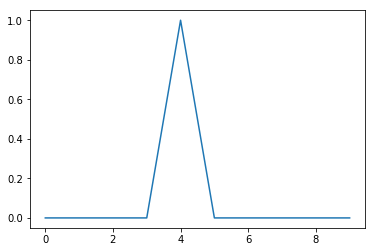

In [70]:
test_hand = [1,2,1,3,1,4,1,5,1,6]
print(hand_encode(test_hand))
prediction = model.predict(np.array(hand_hotencode(test_hand, columns_to_hotencode, encoder)))
print(prediction[0])
plt.plot(prediction[0])

### Random Forest